In [1]:
## Import Libraries
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter

In [2]:
## Load Datasets
train = pd.read_csv('TrainingData.csv')
test = pd.read_csv('testX.csv')

/tmp/ipykernel_19850/3120533363.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('TrainingData.csv')
/tmp/ipykernel_19850/3120533363.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('testX.csv')


In [3]:
## Simple preview
train.head()

,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51,default_ind
0,230032,1696,1.6541,0.000,0.0,0.0,0,6015,322,40369,18414,missing,6423,3067,123875,missing,1,1,1,3,3,94.78,8987.18,NaN,72.25,1462,4532,2890,61,4532,1095,3376,625,1.1667,1,0,8,10,4,1,73.78,82.547,0.08696,10,0.63899,na,0,C,10,770,4,3080,0
1,230033,1846,0.8095,0.000,0.0,0.0,102,7532,3171,18234,13664,missing,765,1931,42613,missing,0,0,0,0,0,74.25,953.06,953.06,4.80,1028,2099,2099,30386,2281,missing,2251,169,0.4167,0,0,8,0,2,0,99.129,missing,0,13,0.63836,na,na,L,732,437,5,2185,1
2,230034,1745,0.4001,0.000,0.0,0.0,missing,2536,missing,missing,2536,missing,missing,missing,76109,missing,na,na,na,0,0,NaN,NaN,NaN,NaN,missing,missing,missing,669,4623,3772,missing,missing,25.0833,0,na,1,na,1,0,missing,29.29,0,1,1.00000,na,0,C,89,795,4,3180,1
3,230035,1739,0.2193,0.000,0.0,0.0,1982,26440,4955,20316,37013,missing,0,0,84235,missing,0,0,0,0,0,NaN,0.00,NaN,0.00,1308,2525,791,91,5992,missing,3741,215,10.3333,0,0,3,3,2,0,96.272,missing,0.15385,3,0.53241,0,0,L,3,755,4,3020,0
4,230036,1787,0.0118,0.225,0.0,0.0,5451,5494,5494,7987,4696,missing,2257,27815,123875,524848,0,0,0,0,0,20.51,796.67,NaN,28.72,801,2281,2281,487,2707,missing,1947,158,0.9167,0,0,2,3,2,0,115.019,missing,0,1,0.92665,na,na,L,5,425,4,1700,0


In [4]:
## Replacing the columns to something we can work with
columns = ['ID',
           'Credit Worthiness Score',
           'Number and Riskiness of Credit Enquiry',
           'Default Severity (Any Loan)',
           'Default Severity (Auto Loan)',
           'Default Severity (Education Loan)',
           'Min Cred Available (Revolving Credit Cards)',
           'Max Cred Available (Active Credit Lines)',
           'Max Cred Available (Active Revolving Credit Cards)',
           'Total Available Credit (Cards with 1 missed payment)',
           'Total Credit Available',
           'Dues Collected Post Default',
           'Total Amount Due (Active Cards)',
           'Credit Amount Paid (Prev Year)',
           'Annual Income',
           'Property Value',
           'Full Credit Utilisation (Revolving Credit Cards)',
           'Full Credit Utilisation (Credit Cards)',
           'Full Credit Utilisation (Credit Lines)',
           '>75 percent Credit Utilisation (Credit Cards)',
           '>75 percent Credit Utilisation (Credit Lines)',
           'Average Utilisation (Revolving Credit Cards)',
           'Average Utilisation Last 2 Years (All Credit Lines)',
           'Average Utilisation Last Year (All Credit Cards)',
           'Average Utilisation Last 6 Months with 1 Missed Payment (Credit Cards)',
           'Average Tenure (Active Revolving Credit Cards)',
           'Tenure of Oldest Active Credit Card',
           'Tenure of Oldest Active Revolving Credit Card',
           'Days Since Last Missed Payment',
           'Tenure of Oldest Credit Line',
           'Max Tenure (Auto Loans)',
           'Max Tenure (Education Loans)',
           'Sum of Tenures (Active Credit Cards)',
           'Stay Duration of Current Residence',
           'Credit Lines with 1 Missed Payment (Last 6 Months)',
           'Revolving Credit Cards with 1 Missed Payment (Last 2 Years)',
           'Active Credit Lines',
           'Credit Cards with >2Y Tenure',
           'Credit Lines activated Prev 2 Years',
           'Credit Lines with Current Delinquency',
           'Utilization on Active Education Loans',
           'Utilization on Active Auto Loans',
           'Financial Stress Index',
           'Credit Lines with No Missed Payments (Prev 2 Years)',
           'Ratio(Max Amount Due : Sum of Amounts Due)',
           'Mortgage Loans (With 2 Missed Payements)',
           'Auto Loans (With 2 Missed Payments)',
           'Type of Product',
           'Int Value for an Application',
           'Bucketized Credit Worthiness Score',
           'Compound of mvar49 and mvar48',
           'mvar51',
           'default_ind']

In [5]:
train.columns = columns
test.columns = columns[:-1]

In [6]:
## Little Preprocessing same as the Pipeline
train.replace('missing', np.nan, inplace = True)
train.replace('na', np.nan, inplace = True)
train.replace('#VALUE!', np.nan, inplace = True)

test.replace('missing', np.nan, inplace = True)
test.replace('na', np.nan, inplace = True)
test.replace('#VALUE!', np.nan, inplace = True)

def convert_to_int(entry):
    return float(entry)

for col in train.columns:
    if col != 'Type of Product':
        train[col] = train[col].apply(convert_to_int)
    if col not in ['Type of Product', 'default_ind']:
        test[col] = test[col].apply(convert_to_int)

In [7]:
## Concatenating Train and Test
df = pd.concat([train, test], axis = 0)
df.shape

(130000, 53)

In [15]:
## Trying to Look at the difference between these columns
df[['Credit Worthiness Score', 'Bucketized Credit Worthiness Score']].head(10)

,Credit Worthiness Score,Bucketized Credit Worthiness Score
0,1696.0,770.0
1,1846.0,437.0
2,1745.0,795.0
3,1739.0,755.0
4,1787.0,425.0
5,1579.0,455.0
6,1818.0,392.0
7,NaN,615.0
8,1836.0,821.0
9,1839.0,408.0


#### From what we can think of, this probably has something to do with plotting a histogram for the Credit Worthiness Score with some number of bins and then taking those bin values as the Bucketized Credit Worthiness Score. Although not very sure as to what is happening in the case of a NaN value, maybe a simple median replacement?

In [8]:
df['Credit_Ratio'] = df['Credit Amount Paid (Prev Year)']/ df['Credit Lines with No Missed Payments (Prev 2 Years)']

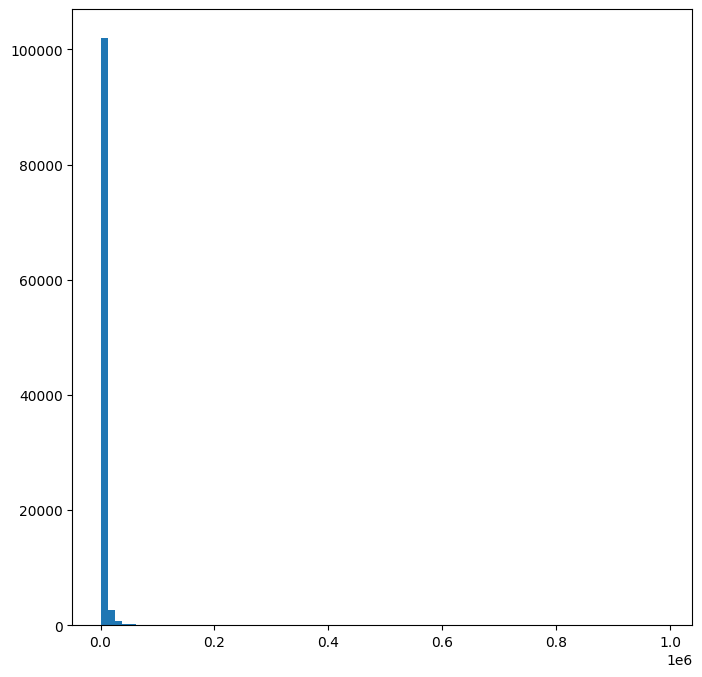

In [11]:
plt.figure(figsize = (8,8))
plt.hist(df[df['Credit_Ratio']<1e8]['Credit_Ratio'], bins = 80)
plt.show()

#### All features remain exponential even after applying a transformation

In [12]:
##Some Helper Functions for Visuals

def get_hist(col, num_bins = 80, fig_size = (8, 8)):
    plt.figure(figsize = fig_size)
    plt.hist(col, bins = num_bins)
    plt.xlabel(col.name)
    
def get_fit(col):
    f = Fitter(col, timeout = 30000,
               distributions = ['gamma',
                                'expon',
                                'lognorm',
                                'norm',
                                'pareto'])
    f.fit()
    print(f.summary())
    print(f.get_best(method = 'sumsquare_error'))

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:02<00:00,  1.98it/s]


         sumsquare_error          aic           bic  kl_div  ks_statistic  \
lognorm         0.000022  1328.528341 -2.784067e+06     inf      0.032693   
gamma           0.000023  1326.962241 -2.781731e+06     inf      0.033621   
norm            0.000025  1317.560188 -2.768104e+06     inf      0.035668   
pareto          0.000393  1300.883776 -2.427264e+06     inf      0.316701   
expon           0.000393  1298.883765 -2.427276e+06     inf      0.316701   

             ks_pvalue  
lognorm  1.294604e-115  
gamma    2.999038e-122  
norm     1.530038e-137  
pareto    0.000000e+00  
expon     0.000000e+00  
{'lognorm': {'s': 0.05872141177827067, 'loc': 128.3354111337136, 'scale': 1616.0312702037636}}


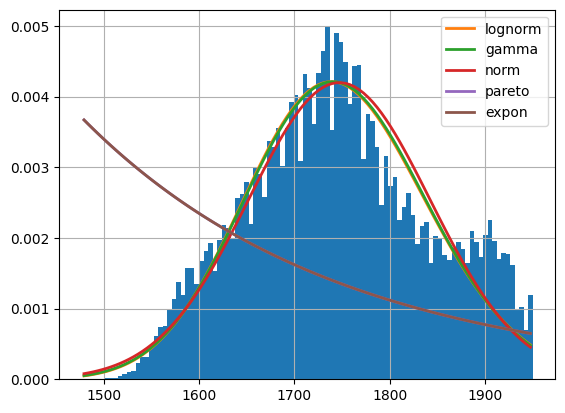

In [13]:
get_fit(df['Credit Worthiness Score'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:01<00:00,  4.48it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
pareto          0.008901   1534.197805 -1.983699e+06     inf      0.090150   
lognorm         0.019112   1375.289091 -1.891396e+06     inf      0.073040   
expon           0.112854   4162.502544 -1.676916e+06     inf      0.144297   
gamma           0.176851   3573.169112 -1.622645e+06     inf      0.314152   
norm            0.736127  23989.018781 -1.450403e+06     inf      0.252193   

         ks_pvalue  
pareto         0.0  
lognorm        0.0  
expon          0.0  
gamma          0.0  
norm           0.0  
{'pareto': {'b': 1.9258159521635958, 'loc': -1.1325515745229406, 'scale': 1.1325515745229404}}


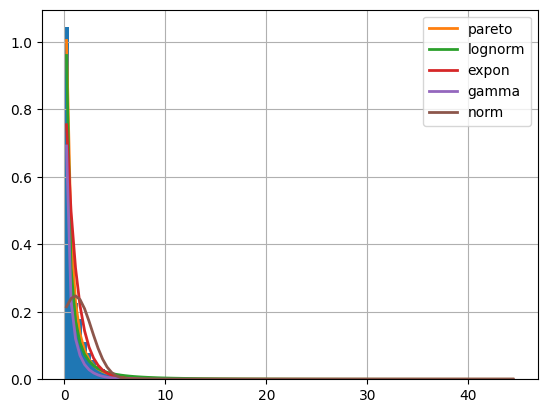

In [14]:
get_fit(df['Number and Riskiness of Credit Enquiry'].dropna().values)

<AxesSubplot: >

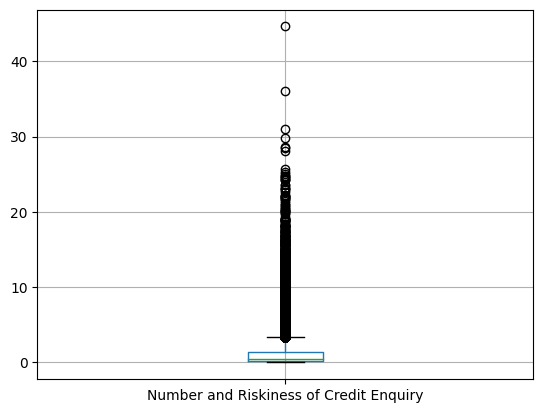

In [15]:
df.boxplot(column = 'Number and Riskiness of Credit Enquiry')

#### From this we can see a large number of outliers

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:02<00:00,  2.48it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon           0.003576   7756.336525 -2.247872e+06     inf      0.466095   
pareto          0.003576   7758.335746 -2.247860e+06     inf      0.466095   
gamma           0.018650  26604.316513 -2.034509e+06     inf      0.466095   
norm            0.020152  42300.391689 -2.024515e+06     inf      0.313349   
lognorm         0.023028   1657.270071 -2.007274e+06     inf      0.466095   

         ks_pvalue  
expon          0.0  
pareto         0.0  
gamma          0.0  
norm           0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 5.385044855269372}}


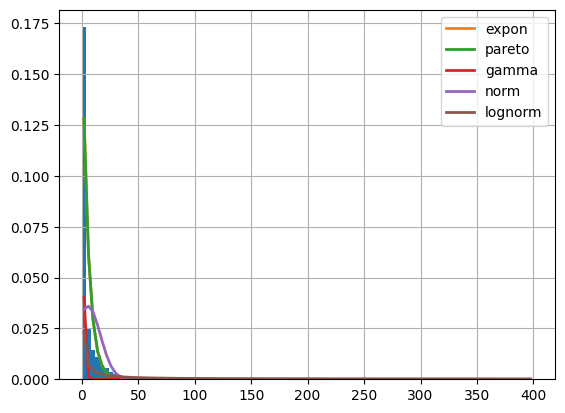

In [16]:
get_fit(df['Default Severity (Any Loan)'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:01<00:00,  3.05it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon           0.030955   24773.833504 -1.969073e+06     inf      0.864350   
pareto          0.030955   24775.823944 -1.969061e+06     inf      0.864350   
norm            0.353924  142965.865787 -1.654342e+06     inf      0.468485   
gamma           0.419987    2606.363873 -1.632224e+06     inf      0.864174   
lognorm         0.537539    1466.613709 -1.600348e+06     inf      0.864340   

         ks_pvalue  
expon          0.0  
pareto         0.0  
norm           0.0  
gamma          0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 0.46016323245929813}}


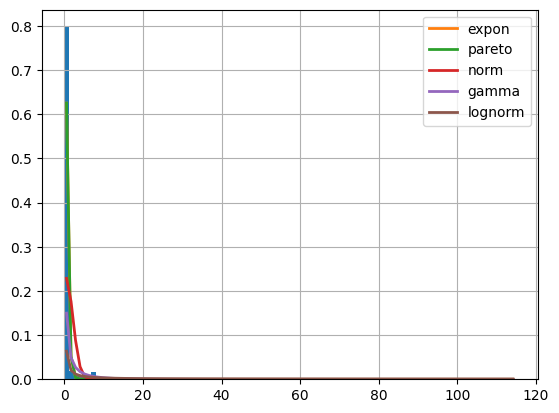

In [17]:
get_fit(df['Default Severity (Auto Loan)'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:01<00:00,  3.76it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon           0.008595  20657.669621 -2.134593e+06     inf      0.903856   
pareto          0.008595  20659.667400 -2.134581e+06     inf      0.903856   
norm            0.123701  49483.350669 -1.790129e+06     inf      0.478047   
gamma           0.134723   2053.604225 -1.779092e+06     inf      0.889391   
lognorm         0.168333  32392.342251 -1.750323e+06     inf      0.859953   

         ks_pvalue  
expon          0.0  
pareto         0.0  
norm           0.0  
gamma          0.0  
lognorm        0.0  
{'expon': {'loc': 0.0, 'scale': 1.0977798499663236}}


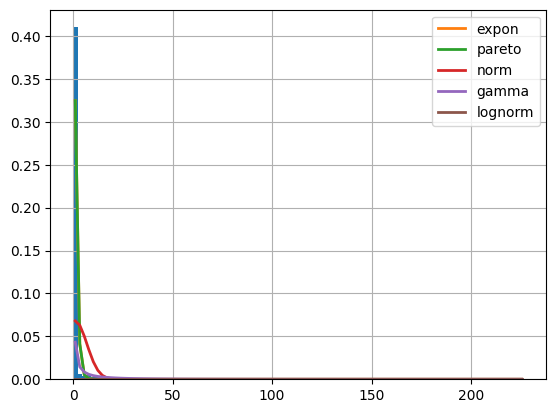

In [18]:
get_fit(df['Default Severity (Education Loan)'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:01<00:00,  3.05it/s]


         sumsquare_error           aic           bic    kl_div  ks_statistic  \
expon       3.514356e-08  9.773189e+03 -2.838040e+06       inf      0.352220   
pareto      1.907094e-07  2.924508e+03 -2.670585e+06       inf      0.203797   
norm        2.059144e-07  4.539816e+04 -2.663002e+06       inf      0.328435   
lognorm     2.511726e-07  2.870706e+03 -2.643321e+06       inf      0.355078   
gamma       3.051599e-07  3.205080e+06 -2.624046e+06  0.292454      0.975045   

         ks_pvalue  
expon          0.0  
pareto         0.0  
norm           0.0  
lognorm        0.0  
gamma          0.0  
{'expon': {'loc': 0.0, 'scale': 1648.164279509505}}


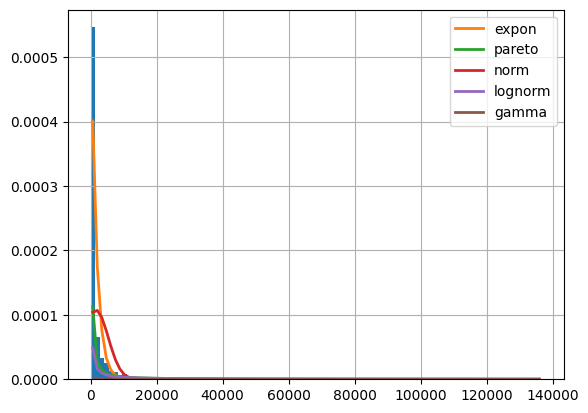

In [19]:
get_fit(df['Min Cred Available (Revolving Credit Cards)'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:00<00:00,  5.12it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon       2.675139e-11  3.374119e+04 -4.245011e+06     inf      0.180130   
norm        7.958585e-11  4.565491e+05 -4.116529e+06     inf      0.356045   
pareto      1.253203e-10  4.377061e+03 -4.063010e+06     inf      0.073780   
lognorm     1.364699e-10  4.332627e+03 -4.052966e+06     inf      0.077739   
gamma       2.784796e-10  2.653045e+08 -3.968913e+06     NaN      0.999940   

         ks_pvalue  
expon          0.0  
norm           0.0  
pareto         0.0  
lognorm        0.0  
gamma          0.0  
{'expon': {'loc': 0.0, 'scale': 17737.62977419875}}


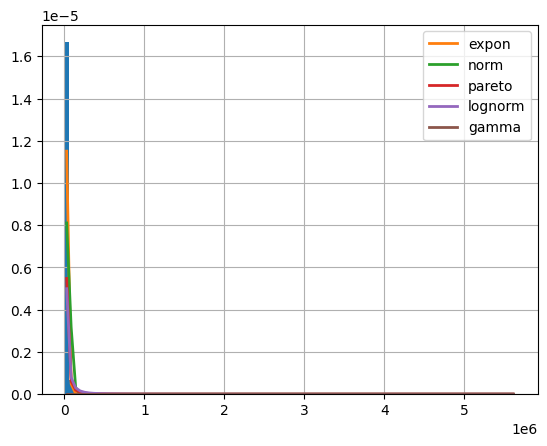

In [20]:
get_fit(df['Max Cred Available (Active Credit Lines)'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:00<00:00,  5.82it/s]


         sumsquare_error           aic           bic    kl_div  ks_statistic  \
pareto      4.476183e-10  3.122065e+03 -3.269557e+06       inf      0.081904   
lognorm     2.967796e-09  3.051984e+03 -3.082306e+06       inf      0.074336   
expon       5.555775e-09  6.025729e+03 -3.020249e+06       inf      0.221207   
norm        2.194972e-08  2.752511e+04 -2.884247e+06       inf      0.250311   
gamma       3.572954e-08  6.715597e+06 -2.836006e+06  0.651894      0.991552   

         ks_pvalue  
pareto         0.0  
lognorm        0.0  
expon          0.0  
norm           0.0  
gamma          0.0  
{'pareto': {'b': 1.0044596338524396, 'loc': -2186.14126648737, 'scale': 2186.1412664873696}}


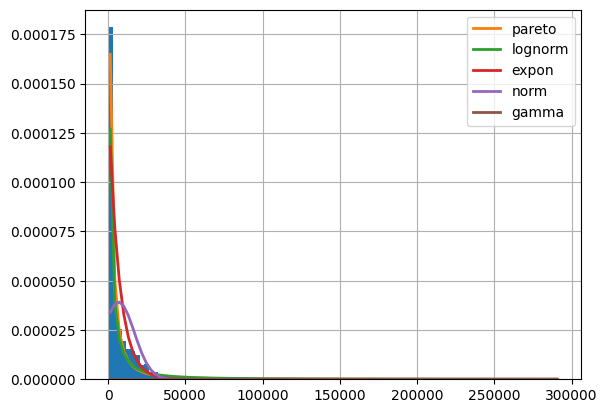

In [21]:
get_fit(df['Max Cred Available (Active Revolving Credit Cards)'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:02<00:00,  2.30it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
expon       3.998439e-12  2.052677e+04 -4.910245e+06     inf      0.247761   
norm        8.835065e-11  2.352060e+05 -4.510411e+06     inf      0.324019   
lognorm     1.772166e-10  3.594574e+03 -4.420489e+06     inf      0.255915   
pareto      1.812901e-10  3.682966e+03 -4.417554e+06     inf      0.299513   
gamma       2.263736e-10  1.265571e+08 -4.388867e+06     NaN      0.999921   

         ks_pvalue  
expon          0.0  
norm           0.0  
lognorm        0.0  
pareto         0.0  
gamma          0.0  
{'expon': {'loc': 0.0, 'scale': 30595.75169156925}}


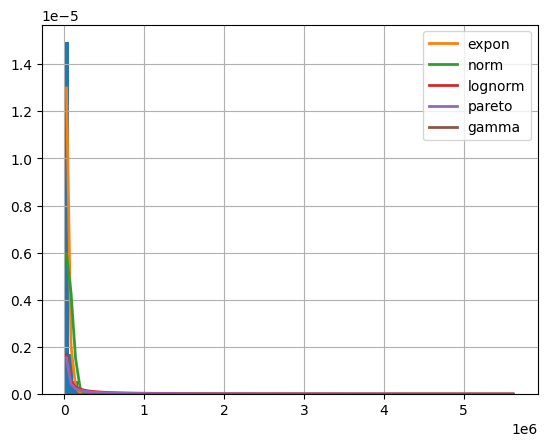

In [22]:
get_fit(df['Total Credit Available'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:00<00:00,  5.51it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon       7.601446e-12   12896.257234 -4.150734e+06     inf      0.172966   
pareto      1.912037e-11    3986.845053 -4.047867e+06     inf      0.068114   
lognorm     5.333021e-11    3920.854423 -3.933490e+06     inf      0.054881   
norm        1.533812e-10  165491.767407 -3.815704e+06     inf      0.255703   
gamma       3.846598e-10    3640.387118 -3.713170e+06     inf      0.503709   

             ks_pvalue  
expon     0.000000e+00  
pareto    0.000000e+00  
lognorm  2.370878e-292  
norm      0.000000e+00  
gamma     0.000000e+00  
{'expon': {'loc': 0.0, 'scale': 34358.64807274945}}


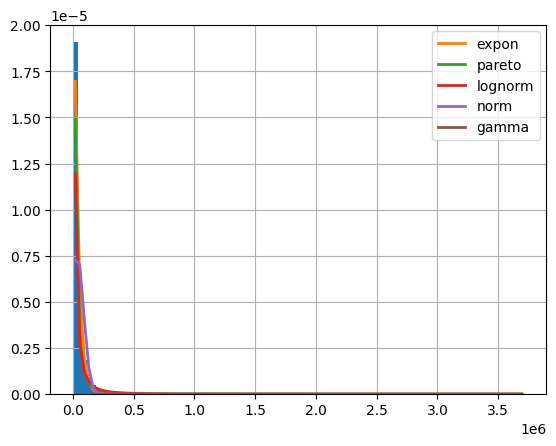

In [23]:
get_fit(df['Total Available Credit (Cards with 1 missed payment)'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:00<00:00,  7.92it/s]


         sumsquare_error            aic           bic  kl_div  ks_statistic  \
expon       2.919360e-10   35470.995403 -1.867613e+06     inf      0.221288   
norm        7.335208e-10  461467.688656 -1.815314e+06     inf      0.363385   
lognorm     1.271357e-09    4406.587279 -1.784083e+06     inf      0.021405   
pareto      1.294702e-09    4135.740089 -1.783050e+06     inf      0.025014   
gamma       2.485521e-09    3577.361359 -1.746028e+06     inf      0.522955   

            ks_pvalue  
expon    0.000000e+00  
norm     0.000000e+00  
lognorm  5.043557e-23  
pareto   2.746374e-31  
gamma    0.000000e+00  
{'expon': {'loc': 0.0, 'scale': 5475.155095569453}}


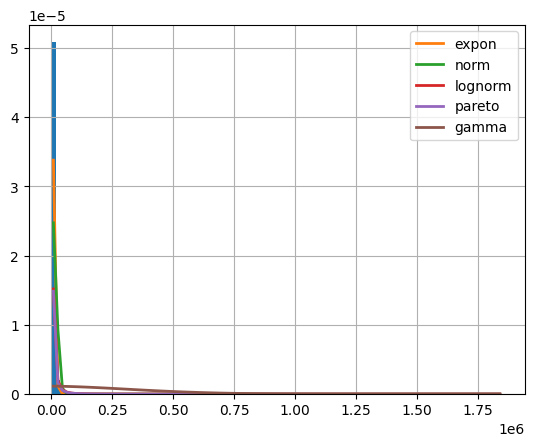

In [24]:
get_fit(df['Dues Collected Post Default'].dropna().values)

Fitting 5 distributions: 100%|████████████████████| 5/5 [00:01<00:00,  2.82it/s]


         sumsquare_error           aic           bic  kl_div  ks_statistic  \
norm        2.389389e-11  7.501690e+05 -4.134231e+06     inf      0.396351   
expon       5.010825e-11  5.908194e+04 -4.049434e+06     inf      0.262683   
pareto      9.479276e-11  3.836230e+03 -3.976425e+06     inf      0.261554   
lognorm     1.031286e-10  3.977402e+03 -3.966774e+06     inf      0.517623   
gamma       1.141018e-10           inf -3.955196e+06     NaN      1.000000   

         ks_pvalue  
norm           0.0  
expon          0.0  
pareto         0.0  
lognorm        0.0  
gamma          0.0  
{'norm': {'loc': 15936.088547124991, 'scale': 60638.527305069445}}


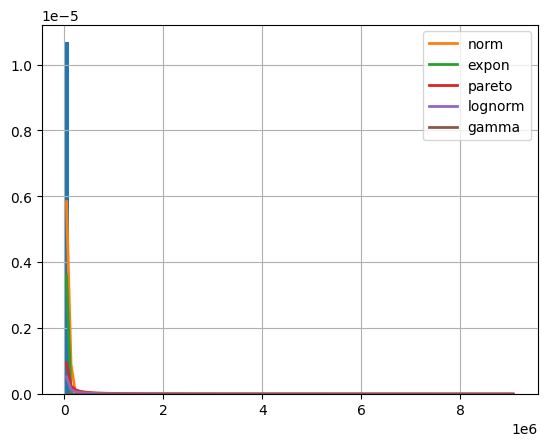

In [25]:
vals = df['Credit Amount Paid (Prev Year)'].dropna().values
get_fit(vals)

#### More or less all columns have an exponential/Pareto distribution, except for one or two columns where we see a Normal/Lognormal distribution